In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import metrics


from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import scipy.stats as stats

from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
# альтернативно можно использовать StratifiedKFold т.к. задача классификации
import seaborn as sns # чтобы подкрасить таблички
     


#Why Fill in the Missing Data?
It it necessary to fill in missing data values in data sets as most of the machine learning models that you want to use will provide an error if you pass NaN values into it. The easiest way is to just fill them up with 0, but this can reduce your model accuracy significantly.

For filling missing values, there are many methods available. For choosing the best method, you need to understand the type of missing value and its significance, before you start filling/deleting the data to completely understand how to handle missing data in Python.

In [16]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

See that the data contains many columns like PassengerId, Name, Age, etc. We won’t be working with all the columns in the dataset, so I am going to be deleting the columns I don’t need.

In [17]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

In [18]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
newdf=df

In [19]:
#splitting the data into x and y
y = df['Survived']
X=df.drop("Survived",axis=1)

#How to Know If the Data Has Missing Values?

Missing Value Treatment in Python – Missing values are usually represented in the form of Nan or null or None in the dataset.

df.info() The function can be used to give information about the dataset. This function is one of the most used functions for data analysis. This will provide you with the column names and the number of non–null values in each column. It will also display the data types of each column. Thus we can find out which number columns are where null values are present, and by looking at the data types, we can have an understanding of which value to replace nulls with.

Sometimes though, instead of np.nan null values could be present as empty strings or other values that represent null values, so we must be careful and make sure that all the null values in our dataset are np.nan values.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


See that there are null values in the column Age.

The second way of finding whether we have null values in the data is by using the isnull() function.

In [21]:
print(df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

ValueError: ignored

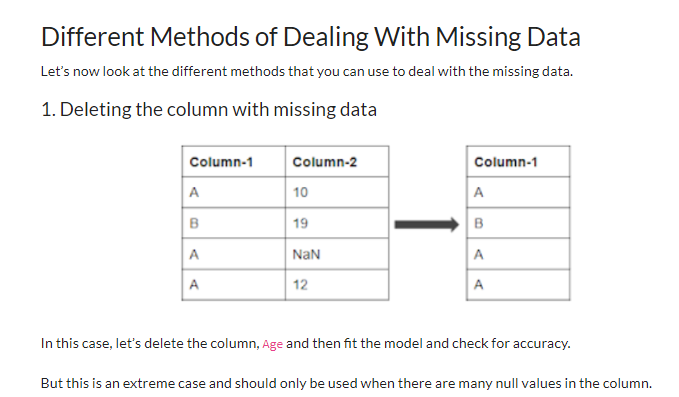

In [26]:
updated_df = X.dropna(axis=1)
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int64  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [28]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.8022388059701493


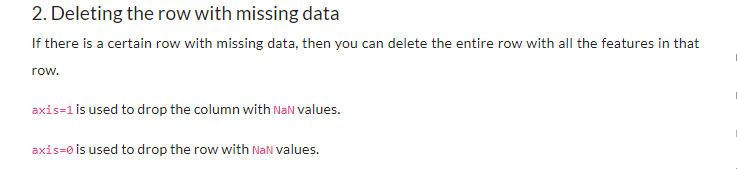

In [31]:
updated_df = X.dropna(axis=0)

In [32]:
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  714 non-null    int64  
 1   Sex     714 non-null    int64  
 2   Age     714 non-null    float64
 3   SibSp   714 non-null    int64  
 4   Parch   714 non-null    int64  
 5   Fare    714 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 39.0 KB


In [46]:
X.dropna(axis=0).index

Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,   9,  10,
            ...
            880, 881, 882, 883, 884, 885, 886, 887, 889, 890],
           dtype='int64', length=714)

In [47]:
y1 = df["Survived"][X.dropna(axis=0).index]

In [49]:
y1.shape

(714,)

In [48]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.7674418604651163


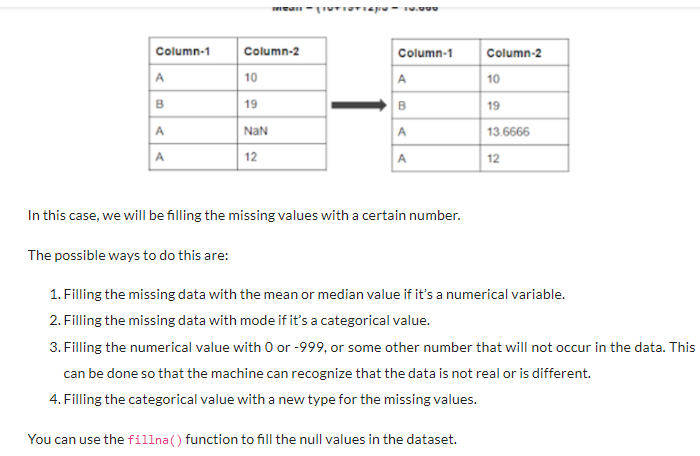

In [50]:
updated_df = df
updated_df['Age']=updated_df['Age'].fillna(updated_df['Age'].mean())
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [51]:
y1 = updated_df['Survived']
updated_df.drop("Survived",axis=1,inplace=True)
from sklearn import metrics
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(updated_df,y1,test_size=0.3)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
print(metrics.accuracy_score(pred,y_test))

0.8395522388059702


. Filling with a Regression Model
In this case, the null values in one column are filled by fitting a regression model using other columns in the dataset.

I.e. in this case the regression model will contain all the columns except Age in X and Age in Y.

Then after filling the values in the Age column, then we will use logistic regression to calculate accuracy.

In [58]:
df=pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
df.drop("Name",axis=1,inplace=True)
df.drop("Ticket",axis=1,inplace=True)
df.drop("PassengerId",axis=1,inplace=True)
df.drop("Cabin",axis=1,inplace=True)
df.drop("Embarked",axis=1,inplace=True)

In [64]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

In [65]:
df['Age'].isnull().sum()

177

In [66]:
df[df['Age'].isnull()==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
5,0,3,1,NaN,0,0,8.4583
17,1,2,1,NaN,0,0,13.0000
19,1,3,0,NaN,0,0,7.2250
26,0,3,1,NaN,0,0,7.2250
28,1,3,0,NaN,0,0,7.8792
...,...,...,...,...,...,...,...
859,0,3,1,NaN,0,0,7.2292
863,0,3,0,NaN,8,2,69.5500
868,0,3,1,NaN,0,0,9.5000
878,0,3,1,NaN,0,0,7.8958


In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
df.head()
testdf = df[df['Age'].isnull()==True]
traindf = df[df['Age'].isnull()==False]
y = traindf['Age']
traindf.drop("Age",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("Age",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Age']= pred

<ipython-input-67-09ec5a198886>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop("Age",axis=1,inplace=True)
<ipython-input-67-09ec5a198886>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop("Age",axis=1,inplace=True)
<ipython-input-67-09ec5a198886>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf['Age']= pred


In [68]:
traindf['Age']=y

<ipython-input-68-09294d128ead>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf['Age']=y


In [69]:
y = traindf['Survived']
traindf.drop("Survived",axis=1,inplace=True)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(traindf,y)

<ipython-input-69-6639128dc763>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traindf.drop("Survived",axis=1,inplace=True)


LogisticRegression()

In [70]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [71]:
y_test = testdf['Survived']
testdf.drop("Survived",axis=1,inplace=True)
pred = lr.predict(testdf)

<ipython-input-71-9b92d9609b12>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testdf.drop("Survived",axis=1,inplace=True)


In [72]:
print(metrics.accuracy_score(pred,y_test))


0.8361581920903954
